In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/BetelLeafDataset/Dataset.zip" -d "/content/"


Archive:  /content/drive/MyDrive/BetelLeafDataset/Dataset.zip
   creating: /content/Dataset/
   creating: /content/Dataset/Poor/
  inflating: /content/Dataset/Poor/Poor0001.jpg  
  inflating: /content/Dataset/Poor/Poor0002.jpg  
  inflating: /content/Dataset/Poor/Poor0003.jpg  
  inflating: /content/Dataset/Poor/Poor0004.jpg  
  inflating: /content/Dataset/Poor/Poor0005.jpg  
  inflating: /content/Dataset/Poor/Poor0006.jpg  
  inflating: /content/Dataset/Poor/Poor0007.jpg  
  inflating: /content/Dataset/Poor/Poor0008.jpg  
  inflating: /content/Dataset/Poor/Poor0009.jpg  
  inflating: /content/Dataset/Poor/Poor0010.jpg  
  inflating: /content/Dataset/Poor/Poor0011.jpg  
  inflating: /content/Dataset/Poor/Poor0012.jpg  
  inflating: /content/Dataset/Poor/Poor0013.jpg  
  inflating: /content/Dataset/Poor/Poor0014.jpg  
  inflating: /content/Dataset/Poor/Poor0015.jpg  
  inflating: /content/Dataset/Poor/Poor0016.jpg  
  inflating: /content/Dataset/Poor/Poor0017.jpg  
  inflating: /content

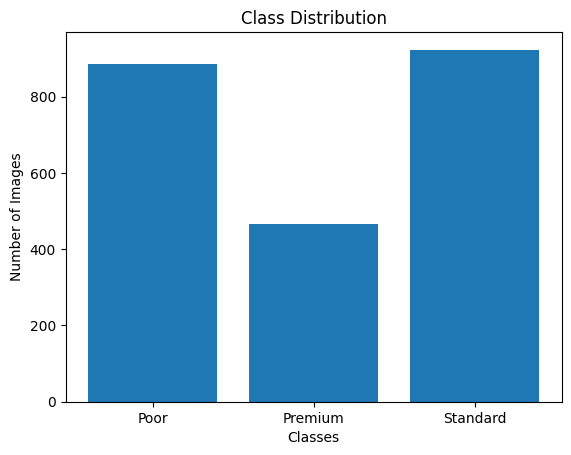

{'Poor': 886, 'Premium': 465, 'Standard': 923}

In [ ]:
DATASET_PATH = "/content/Dataset"  # change if needed

import os
import matplotlib.pyplot as plt

classes = os.listdir(DATASET_PATH)
class_counts = {}

for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    if os.path.isdir(class_path):
        class_counts[cls] = len(os.listdir(class_path))

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

class_counts



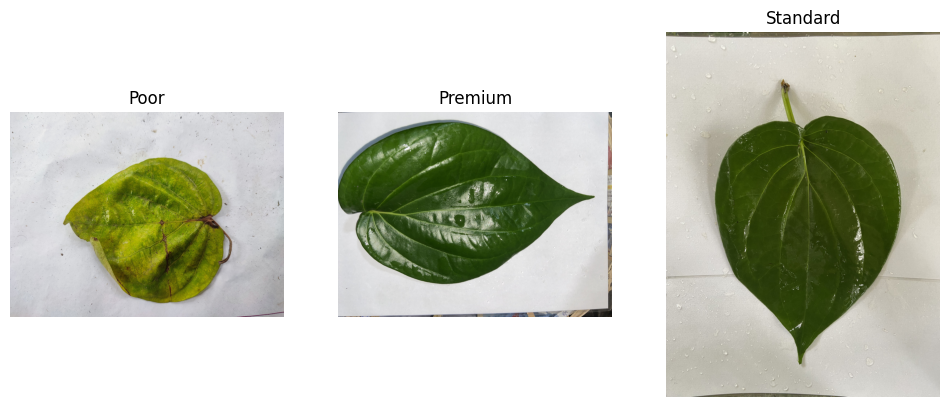

In [ ]:
import random
from PIL import Image

plt.figure(figsize=(12, 6))

for i, cls in enumerate(classes):
    class_path = os.path.join(DATASET_PATH, cls)
    images = os.listdir(class_path)
    sample = random.choice(images)

    img = Image.open(os.path.join(class_path, sample))

    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


In [ ]:
widths = []
heights = []

for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)

print("Min Width:", min(widths))
print("Max Width:", max(widths))
print("Mean Width:", sum(widths)/len(widths))

print("Min Height:", min(heights))
print("Max Height:", max(heights))
print("Mean Height:", sum(heights)/len(heights))


Min Width: 1200
Max Width: 4640
Mean Width: 3281.9595426561127
Min Height: 1600
Max Height: 4640
Mean Height: 3785.3368513632367


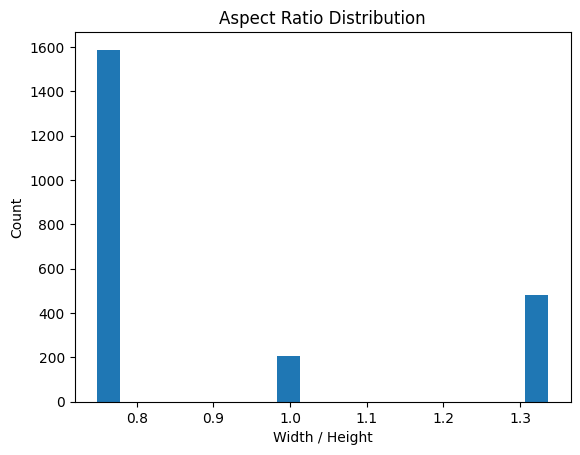

In [ ]:
import numpy as np

aspect_ratios = np.array(widths) / np.array(heights)

plt.hist(aspect_ratios, bins=20)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Count")
plt.show()


R Mean: 150.43940586942819 R Std: 28.35890833260091
G Mean: 158.77496313054 G Std: 19.759696337274924
B Mean: 129.1679737966518 B Std: 36.652660488397586


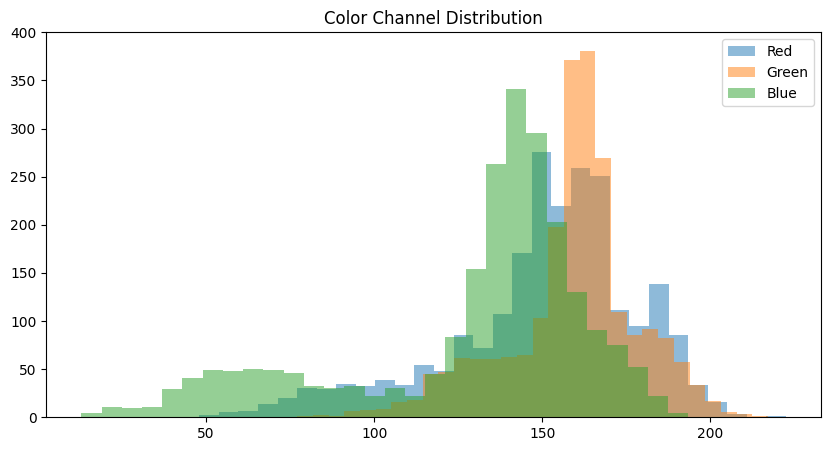

In [ ]:
import numpy as np

r_vals, g_vals, b_vals = [], [], []

for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_name)).convert("RGB")
        arr = np.array(img)

        r_vals.append(arr[:, :, 0].mean())
        g_vals.append(arr[:, :, 1].mean())
        b_vals.append(arr[:, :, 2].mean())

print("R Mean:", np.mean(r_vals), "R Std:", np.std(r_vals))
print("G Mean:", np.mean(g_vals), "G Std:", np.std(g_vals))
print("B Mean:", np.mean(b_vals), "B Std:", np.std(b_vals))

plt.figure(figsize=(10,5))
plt.hist(r_vals, bins=30, alpha=0.5, label="Red")
plt.hist(g_vals, bins=30, alpha=0.5, label="Green")
plt.hist(b_vals, bins=30, alpha=0.5, label="Blue")
plt.legend()
plt.title("Color Channel Distribution")
plt.show()


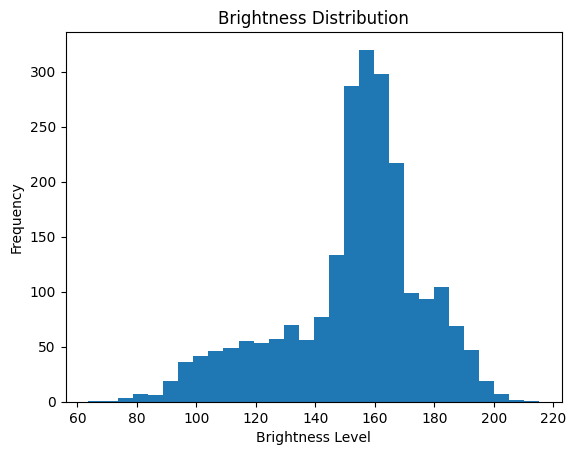

In [ ]:
brightness = []

for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_name)).convert("L")
        brightness.append(np.array(img).mean())

plt.hist(brightness, bins=30)
plt.title("Brightness Distribution")
plt.xlabel("Brightness Level")
plt.ylabel("Frequency")
plt.show()


In [ ]:
TEST_PATH = "/content/Dataset_test"       # Separate folder for test set
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32

from sklearn.model_selection import train_test_split
import shutil

os.makedirs(TEST_PATH, exist_ok=True)

classes = os.listdir(DATASET_PATH)

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    os.makedirs(os.path.join(TEST_PATH, cls), exist_ok=True)

    images = os.listdir(cls_path)
    test_images = train_test_split(images, test_size=0.15, random_state=42)[1]  # 15% test

    for img in test_images:
        shutil.move(os.path.join(cls_path, img), os.path.join(TEST_PATH, cls, img))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Strong augmentation for minority class (Premium)
premium_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.15,
    zoom_range=0.20,
    brightness_range=[0.7,1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Medium augmentation for Standard
standard_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    zoom_range=0.15,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Light augmentation for Poor
poor_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.10,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Validation generator (same for all, no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Test generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for training (all classes together)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.15,
    zoom_range=0.20,
    brightness_range=[0.7,1.3],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # one-hot labels
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1547 images belonging to 3 classes.
Found 385 images belonging to 3 classes.


In [ ]:
import numpy as np

def combined_train_generator():
    while True:
        batch1 = next(train_premium)
        batch2 = next(train_standard)
        batch3 = next(train_poor)

        X = np.concatenate([batch1[0], batch2[0], batch3[0]])
        y = np.concatenate([batch1[1], batch2[1], batch3[1]])

        yield X, y


In [ ]:
import os

dataset_path = "/content/Dataset"
total_counts = {}

for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    total_counts[cls] = len(os.listdir(cls_path))

print("Number of images per class (after test split):")
print(total_counts)

total_images = sum(total_counts.values())
print("Total images for training + validation:", total_images)


Number of images per class (after test split):
{'Poor': 753, 'Premium': 395, 'Standard': 784}
Total images for training + validation: 1932


Model training


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
input_shape = (224, 224, 3)
num_classes = 3  # Poor, Standard, Premium

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 4
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten + Dense
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,082,499 (99.50 MB)

 Trainable params: 26,081,539 (99.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
checkpoint = ModelCheckpoint(
    "best_betel_leaf_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


In [55]:
steps_per_epoch = train_generator.n // BATCH_SIZE
val_steps = val_generator.n // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps,
    epochs=50,
    callbacks=[checkpoint, early_stop]
)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_steps = test_generator.n // BATCH_SIZE
loss, acc = model.evaluate(test_generator, steps=test_steps)
print("Test Accuracy:", acc)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6892 - loss: 2.4819
Epoch 1: val_accuracy improved from -inf to 0.40365, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.6911 - loss: 2.4670 - val_accuracy: 0.4036 - val_loss: 4.6031
Epoch 2/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.7500 - loss: 1.6090
Epoch 2: val_accuracy did not improve from 0.40365
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 663ms/step - accuracy: 0.7500 - loss: 1.6090 - val_accuracy: 0.4036 - val_loss: 4.6718
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8651 - loss: 0.6181
Epoch 3: val_accuracy did not improve from 0.40365
48/48 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.8653 - loss: 0.6159 - val_accuracy: 0.4036 - val_loss: 8.0618
Epoch 4/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9062 - loss: 0.2925
Epoch 4: val_accuracy improved from 0.40365 to 0.40625, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 36s 767ms/step - accuracy: 0.9062 - loss: 0.2925 - val_accuracy: 0.4062 - val_loss: 8.0482
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8862 - loss: 0.3542
Epoch 5: val_accuracy did not improve from 0.40625
48/48 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.8862 - loss: 0.3545 - val_accuracy: 0.4036 - val_loss: 10.7997
Epoch 6/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8750 - loss: 0.4465
Epoch 6: val_accuracy did not improve from 0.40625
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 686ms/step - accuracy: 0.8750 - loss: 0.4465 - val_accuracy: 0.4036 - val_loss: 10.8322
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8892 - loss: 0.3737
Epoch 7: val_accuracy did not improve from 0.40625
48/48 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.8895 - loss: 0.3724 - val_accuracy: 0.4036 - val_loss: 10.8212
Epoch 8/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9688 - loss: 0.0873
Epoch 8: val_accuracy did not improve 

48/48 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.9063 - loss: 0.3015 - val_accuracy: 0.4167 - val_loss: 9.9715
Epoch 10/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9375 - loss: 0.2254
Epoch 10: val_accuracy did not improve from 0.41667
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 657ms/step - accuracy: 0.9375 - loss: 0.2254 - val_accuracy: 0.4167 - val_loss: 9.9681
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9150 - loss: 0.2523
Epoch 11: val_accuracy improved from 0.41667 to 0.52083, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.9150 - loss: 0.2526 - val_accuracy: 0.5208 - val_loss: 8.6794
Epoch 12/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9375 - loss: 0.1806
Epoch 12: val_accuracy did not improve from 0.52083
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 733ms/step - accuracy: 0.9375 - loss: 0.1806 - val_accuracy: 0.5130 - val_loss: 8.7472
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9249 - loss: 0.2190
Epoch 13: val_accuracy improved from 0.52083 to 0.75260, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.9249 - loss: 0.2194 - val_accuracy: 0.7526 - val_loss: 6.9641
Epoch 14/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8750 - loss: 0.3834
Epoch 14: val_accuracy did not improve from 0.75260
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 673ms/step - accuracy: 0.8750 - loss: 0.3834 - val_accuracy: 0.7422 - val_loss: 7.1189
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9012 - loss: 0.2648
Epoch 15: val_accuracy did not improve from 0.75260
48/48 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9013 - loss: 0.2647 - val_accuracy: 0.7214 - val_loss: 5.3924
Epoch 16/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9688 - loss: 0.1192
Epoch 16: val_accuracy did not improve from 0.75260
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 672ms/step - accuracy: 0.9688 - loss: 0.1192 - val_accuracy: 0.7161 - val_loss: 5.3853
Epoch 17/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9127 - loss: 0.2575
Epoch 17: val_accuracy did not impr

48/48 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9210 - loss: 0.2154 - val_accuracy: 0.7839 - val_loss: 2.2165
Epoch 20/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 1.0000 - loss: 0.0912
Epoch 20: val_accuracy did not improve from 0.78385
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 715ms/step - accuracy: 1.0000 - loss: 0.0912 - val_accuracy: 0.7734 - val_loss: 2.0806
Epoch 21/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9311 - loss: 0.2117
Epoch 21: val_accuracy did not improve from 0.78385
48/48 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.9310 - loss: 0.2119 - val_accuracy: 0.7526 - val_loss: 1.8291
Epoch 22/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8438 - loss: 0.3176
Epoch 22: val_accuracy did not improve from 0.78385
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 723ms/step - accuracy: 0.8438 - loss: 0.3176 - val_accuracy: 0.7552 - val_loss: 1.8050
Epoch 23/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9301 - loss: 0.2161
Epoch 23: val_accuracy improved fr

48/48 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9298 - loss: 0.2164 - val_accuracy: 0.9010 - val_loss: 0.4440
Epoch 24/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9062 - loss: 0.3154
Epoch 24: val_accuracy improved from 0.90104 to 0.91406, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 730ms/step - accuracy: 0.9062 - loss: 0.3154 - val_accuracy: 0.9141 - val_loss: 0.3945
Epoch 25/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9234 - loss: 0.2375
Epoch 25: val_accuracy did not improve from 0.91406
48/48 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.9234 - loss: 0.2377 - val_accuracy: 0.8594 - val_loss: 0.6926
Epoch 26/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8438 - loss: 0.4971
Epoch 26: val_accuracy did not improve from 0.91406
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 696ms/step - accuracy: 0.8438 - loss: 0.4971 - val_accuracy: 0.8568 - val_loss: 0.6000
Epoch 27/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9292 - loss: 0.2107
Epoch 27: val_accuracy improved from 0.91406 to 0.97396, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9291 - loss: 0.2109 - val_accuracy: 0.9740 - val_loss: 0.1050
Epoch 28/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9062 - loss: 0.2881
Epoch 28: val_accuracy did not improve from 0.97396
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 711ms/step - accuracy: 0.9062 - loss: 0.2881 - val_accuracy: 0.9661 - val_loss: 0.1256
Epoch 29/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9107 - loss: 0.2623
Epoch 29: val_accuracy improved from 0.97396 to 0.97917, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.9108 - loss: 0.2619 - val_accuracy: 0.9792 - val_loss: 0.0628
Epoch 30/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 1.0000 - loss: 0.0544
Epoch 30: val_accuracy did not improve from 0.97917
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 829ms/step - accuracy: 1.0000 - loss: 0.0544 - val_accuracy: 0.9583 - val_loss: 0.1126
Epoch 31/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9177 - loss: 0.2526
Epoch 31: val_accuracy improved from 0.97917 to 0.99219, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.9177 - loss: 0.2526 - val_accuracy: 0.9922 - val_loss: 0.0431
Epoch 32/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 1.0000 - loss: 0.0646
Epoch 32: val_accuracy did not improve from 0.99219
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 0.9844 - val_loss: 0.0527
Epoch 33/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9165 - loss: 0.2525
Epoch 33: val_accuracy did not improve from 0.99219
48/48 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.9165 - loss: 0.2524 - val_accuracy: 0.9766 - val_loss: 0.0634
Epoch 34/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8750 - loss: 0.2336
Epoch 34: val_accuracy did not improve from 0.99219
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 677ms/step - accuracy: 0.8750 - loss: 0.2336 - val_accuracy: 0.9844 - val_loss: 0.0605
Epoch 35/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9286 - loss: 0.2416
Epoch 35: val_accuracy did not imp

48/48 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.9123 - loss: 0.2317 - val_accuracy: 0.9948 - val_loss: 0.0349
Epoch 42/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9375 - loss: 0.2531
Epoch 42: val_accuracy improved from 0.99479 to 0.99740, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 690ms/step - accuracy: 0.9375 - loss: 0.2531 - val_accuracy: 0.9974 - val_loss: 0.0338
Epoch 43/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9218 - loss: 0.2220
Epoch 43: val_accuracy did not improve from 0.99740
48/48 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.9219 - loss: 0.2218 - val_accuracy: 0.9974 - val_loss: 0.0385
Epoch 44/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9688 - loss: 0.1027
Epoch 44: val_accuracy improved from 0.99740 to 1.00000, saving model to best_betel_leaf_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 36s 764ms/step - accuracy: 0.9688 - loss: 0.1027 - val_accuracy: 1.0000 - val_loss: 0.0307
Epoch 45/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9315 - loss: 0.2019
Epoch 45: val_accuracy did not improve from 1.00000
48/48 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9314 - loss: 0.2021 - val_accuracy: 0.9193 - val_loss: 0.3316
Epoch 46/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9062 - loss: 0.3091
Epoch 46: val_accuracy did not improve from 1.00000
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 683ms/step - accuracy: 0.9062 - loss: 0.3091 - val_accuracy: 0.8672 - val_loss: 0.5098
Epoch 47/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9385 - loss: 0.2107
Epoch 47: val_accuracy did not improve from 1.00000
48/48 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9383 - loss: 0.2110 - val_accuracy: 0.9688 - val_loss: 0.1045
Epoch 48/50
 1/48 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8750 - loss: 0.2687
Epoch 48: val_accuracy did not imp